In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import linkage,dendrogram

In [ ]:
data=pd.read_csv('/content/google_review_changed.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5455 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User          5455 non-null   object 
 1   Category 1    5455 non-null   float64
 2   Category 2    5455 non-null   float64
 3   Category 3    5455 non-null   float64
 4   Category 4    5455 non-null   float64
 5   Category 5    5455 non-null   float64
 6   Category 6    5455 non-null   float64
 7   Category 7    5455 non-null   float64
 8   Category 8    5455 non-null   float64
 9   Category 9    5455 non-null   float64
 10  Category 10   5455 non-null   float64
 11  Category 11   5455 non-null   object 
 12  Category 12   5455 non-null   float64
 13  Category 13   5455 non-null   float64
 14  Category 14   5455 non-null   float64
 15  Category 15   5455 non-null   float64
 16  Category 16   5455 non-null   float64
 17  Category 17   5455 non-null   float64
 18  Category 18   5455 non-null   flo

In [ ]:
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Category 11 ']=data['Category 11'].astype('float')

In [ ]:
data.drop(['User'],axis=1,inplace=True)

# applying K-means

In [ ]:
inertia = []
for i in range(1,12):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(data)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

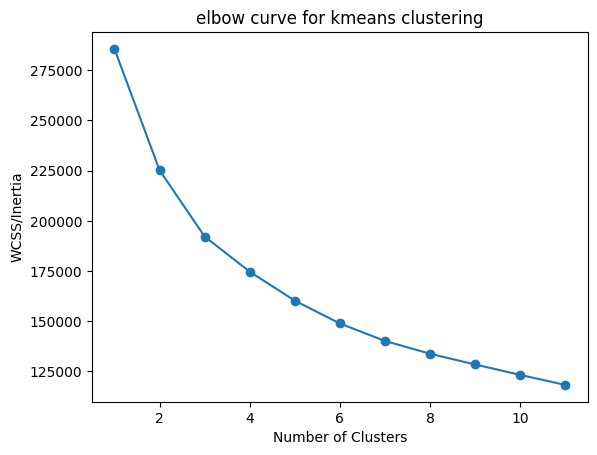

In [ ]:
plt.plot(range(1,12),inertia,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS/Inertia')
plt.title('elbow curve for kmeans clustering')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=12,random_state=123)
kmeans.fit(data)
data['clusters']=kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(silhouette_score(data, kmeans.fit_predict(data)))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.25000935644747296


# Hierarchical clustering

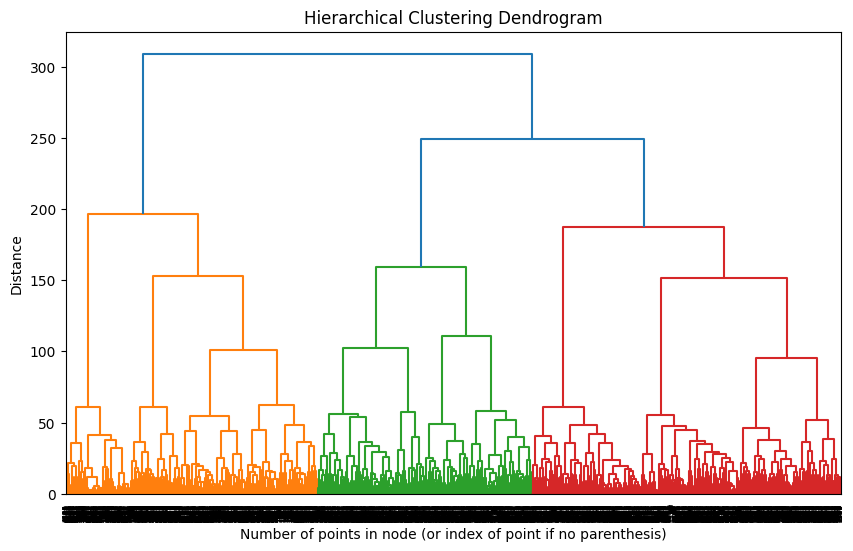

In [ ]:
# Perform hierarchical clustering (linkage calculation)
distance_matrix = linkage(data, method='ward')  # Ward's method for minimizing variance
# Generate the dendrogram
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
dendrogram(distance_matrix, labels=np.arange(len(data)))  # Labels for data points
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis)")
plt.ylabel("Distance")
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
agg=AgglomerativeClustering (n_clusters=3)
agg.fit(data)

AgglomerativeClustering(n_clusters=3)

In [ ]:
print(round(silhouette_score(data,agg.fit_predict(data)),2))

0.17
